In [127]:
#Load Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_columns=None

In [128]:
df = pd.read_csv(r"C:\Users\myeon\\Desktop\\Project\\opioid2013.csv")
df1 = pd.read_csv(r"C:\Users\myeon\\Desktop\\Project\\opioid2014.csv")
df2 = pd.read_csv(r"C:\Users\myeon\\Desktop\\Project\\opioid2015.csv")
df3 = pd.read_csv(r"C:\Users\myeon\\Desktop\\Project\\opioid2016.csv")

In [129]:
df.count()

NPI                          1049326
NPPES Provider Last Name     1049299
NPPES Provider First Name    1042562
NPPES Provider ZIP Code      1049260
NPPES Provider State         1049326
Specialty Description        1049326
Total Claim Count            1049326
Opioid Claim Count            730220
Opioid Prescribing Rate       730220
dtype: int64

In [130]:
df['Year'] = 2013
df1['Year'] = 2014
df2['Year'] = 2015
df3['Year'] = 2016

In [131]:
df_apped = df.append(df2, sort=True)
dfp = df_apped.append(df1, sort= True)
dfpp = dfp.append(df3, sort=True) 

In [132]:
dfpp.fillna(0)

Extended-Release Opioid Claims  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
5                                   0.0   
6                                   0.0   
7                                   0.0   
8                                   0.0   
9                                   0.0   
10                                  0.0   
11                                  0.0   
12                                  0.0   
13                                  0.0   
14                                  0.0   
15                                  0.0   
16                                  0.0   
17                                  0.0   
18                                  0.0   
19                                  0.0   
20                                  0.0   
21                                  0.0   
22                                  0.0   
23                                  0.0   
24                                  0.0   
25                                  0.0   
26                                  0.0   
27                                  0.0   
28                                  0.0   
29                                  0.0   
...                                 ...   
1131520                             0.0   
1131521                             0.0   
1131522                             0.0   
1131523                             0.0   
1131524                             0.0   
1131525                             0.0   
1131526                             0.0   
1131527                             0.0   
1131528                             0.0   
1131529                             0.0   
1131530                             0.0   
1131531                             0.0   
1131532                             0.0   
1131533                            27.0   
1131534                             0.0   
1131535                             0.0   
1131536                             0.0   
1131537                             0.0   
1131538                             0.0   
1131539                             0.0   
1131540                             0.0   
1131541                             0.0   
1131542                             0.0   
1131543                             0.0   
1131544                             0.0   
1131545                             0.0   
1131546                             0.0   
1131547                             0.0   
1131548                             0.0   
1131549                             0.0   

         Extended-Release Opioid Prescribing Rate         NPI  \
0                                        0.000000  1447268107   
1                                        0.000000  1174856348   
2                                        0.000000  1720181522   
3                                        0.000000  1821285826   
4                                        0.000000  1457520132   
5                                        0.000000  1649426404   
6                                        0.000000  1134381320   
7                                        0.000000  1437329034   
8                                        0.000000  1194830265   
9                                        0.000000  1437186798   
10                                       0.000000  1629261243   
11                                       0.000000  1073694048   
12                                       0.000000  1346223039   
13                                       0.000000  1851464192   
14                                       0.000000  1215149745   
15                                       0.000000  1902945116   
16                                       0.000000  1144395633   
17                                       0.000000  1093969024   
18                                       0.000000  1568515500   
19                                       0

In [133]:
doctors = dfpp['NPI'].nunique()
doctors 

1323910

In [52]:
total = dfpp['Opioid Claim Count'].sum()
total 

315982120.0

In [134]:
fat = total / doctors 
fat

238.67341435596074

In [135]:
dfpp.count()

Extended-Release Opioid Claims              1079634
Extended-Release Opioid Prescribing Rate     465162
NPI                                         4356141
NPPES Provider First Name                   4349272
NPPES Provider Last Name                    3283059
NPPES Provider Last/Org Name                1072972
NPPES Provider State                        4356141
NPPES Provider ZIP Code                     3282964
NPPES Provider Zip Code                     1072931
Opioid Claim Count                          3085346
Opioid Prescribing Rate                     3085346
Specialty Description                       4356141
Total Claim Count                           4356141
Year                                        4356141
dtype: int64

In [136]:
dfpp = dfpp.rename(columns={'Specialty Description': 'specialty',
                        'Opioid Claim Count': 'opioid_count', 
                        'Total Claim Count': 'claim_count',
                        'NPPES Provider State': 'state',})

In [138]:
df_final = dfpp[['NPI','state','claim_count','specialty','opioid_count','Year']]
df_final.to_csv(r"C:\Users\myeon\\Desktop\\Project\\finalopioid.csv")

In [97]:
#Group by Specialty
claims = df_final[['specialty','claim_count']]
opioids = df_final[['specialty','opioid_count']]

In [120]:
#Grouped claims and opioids 
grouped_claims = claims.groupby('specialty').sum()
grouped_opioid = opioids.groupby('specialty').sum()
special_opioid = grouped_opioid.sort_values(by='opioid_count', ascending=False)
special_opioid20 = special_opioid.head(20)
special_opioid20.reset_index()

specialty  opioid_count
0                        Family Practice    83619084.0
1                      Internal Medicine    71777195.0
2                     Nurse Practitioner    26650801.0
3                    Physician Assistant    19630966.0
4                     Orthopedic Surgery    13181847.0
5   Physical Medicine and Rehabilitation    11927966.0
6                         Anesthesiology    10705790.0
7                     Emergency Medicine     9807016.0
8         Interventional Pain Management     9614500.0
9                        Pain Management     7833359.0
10                      General Practice     5760470.0
11                          Rheumatology     5615656.0
12                               Dentist     4465046.0
13                             Neurology     4150757.0
14                       General Surgery     3809644.0
15                   Hematology/Oncology     2447128.0
16                    Geriatric Medicine     1982833.0
17                               Urology     1844296.0
18                          Neurosurgery     1537677.0
19                              Podiatry     1469586.0

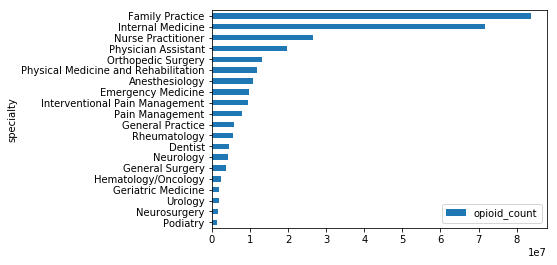

In [125]:
df.plot.barh()

In [124]:
df = special_opioid20.sort_values(by='opioid_count', ascending = True)